# import labrairis

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Data Spliting

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


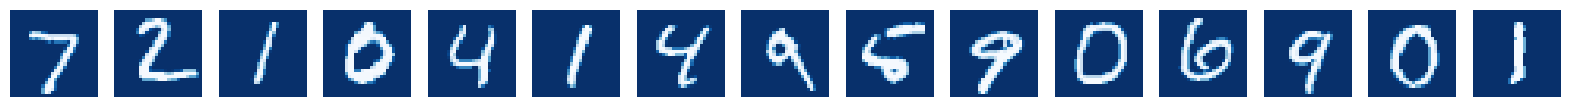

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))

n = 15

for v in range(n):
    pic = plt.subplot(2,n,v+1)
    plt.imshow(x_test[v],cmap = 'Blues_r')
    plt.axis('off')

plt.show()
plt.close()

In [7]:
print(f'Previous x_train shape : {x_train.shape}')
# print(f'Previous y_train shape : {y_train.shape}')
print(f'Previous x_test shape : {x_test.shape}')
# print(f'Previous y_test shape : {y_test.shape}')

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

print('==================================')
print(f'After x_train reshape : {x_train.shape}')
print(f'After x_test reshape : {x_test.shape}')

Previous x_train shape : (60000, 28, 28)
Previous x_test shape : (10000, 28, 28)
After x_train reshape : (60000, 784)
After x_test reshape : (10000, 784)


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255 #it convets the range (0,255) to range(0,1) #1 is for white and #0 is for black


# PreProcessing the Target variable

In [9]:
classes = 10

y_train = to_categorical(y_train , classes)
y_test = to_categorical(y_test , classes)

print(f'After y_train shape : {y_train.shape}')
print(f'After y_test shape : {y_test.shape}')

After y_train shape : (60000, 10)
After y_test shape : (10000, 10)


# Setting up Hyper-Parameters

In [28]:
input_size = 784

batch_size = 200

hidden_layer1 = 400

hidden_layer2 = 20

classes = 10

epochs = 10

In [29]:
model = Sequential()

model.add(Dense(hidden_layer1,input_dim = input_size,activation = 'relu'))

model.add(Dense(hidden_layer2 , activation = 'relu'))

model.add(Dense(classes , activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'], optimizer= 'sgd')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from time import time

curr_time = time()

model.fit(x_train,y_train,batch_size = batch_size, epochs = epochs ,verbose = 1)

training_time = time()

print(f'Total Training time : {training_time - curr_time }')

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4007 - loss: 1.8951
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8126 - loss: 0.8057
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8680 - loss: 0.5265
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8851 - loss: 0.4325
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8985 - loss: 0.3734
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9026 - loss: 0.3475
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9081 - loss: 0.3210
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9126 - loss: 0.3044
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9161 - loss: 0.2944
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9210 - loss: 0.2767
Total Training time : 44.105862855911255


# Testing the Model

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test ,verbose = 0)

y_pred = np.where(y_pred_probs > 0.5,1,0)

test_accuracy = accuracy_score(y_pred , y_test)
print(f'Accuracy Score : {test_accuracy}')

Accuracy Score : 0.9052


In [32]:
mask = range(20,50)

x_valid = x_test[0:20]

actual_labels = y_test[0:20]

y_pred_probs_valid = model.predict(x_valid , verbose = 1)

y_pred_valid = np.where(y_pred_probs_valid > 0.5 , 1 , 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [20]:
n = len(x_valid)
a = len(actual_labels.shape)
print(y_pred_probs_valid)
print(y_pred_valid)
print(a)
print(n)

[[3.59675469e-04 3.17535569e-06 5.71246601e-05 2.90836929e-03
  6.03825210e-05 5.29731158e-04 2.05098490e-06 9.91896689e-01
  1.52214358e-04 4.03067982e-03]
 [2.49893172e-03 2.89349188e-03 8.25076640e-01 2.78731063e-02
  1.97217778e-05 2.83125434e-02 5.97841144e-02 9.87447311e-06
  5.34976944e-02 3.37876554e-05]
 [2.25922966e-04 9.35465634e-01 2.17129067e-02 1.20730866e-02
  6.09457958e-04 1.94543356e-03 3.74354329e-03 7.94903841e-03
  1.31049557e-02 3.17002041e-03]
 [9.98044431e-01 2.94597466e-08 8.66127448e-05 4.32932211e-05
  2.36967571e-06 1.05643901e-03 4.67669364e-04 8.08870100e-05
  1.10120433e-04 1.08023982e-04]
 [2.90021300e-03 7.11535758e-05 1.52003476e-02 3.19837872e-03
  8.19041491e-01 1.20206177e-03 1.06283855e-02 2.08387375e-02
  7.99454004e-03 1.18924737e-01]
 [2.49755558e-05 9.74493325e-01 7.15967175e-03 7.23237079e-03
  8.01123970e-05 3.42436892e-04 2.45216186e-04 2.51244591e-03
  6.56987401e-03 1.33945618e-03]
 [5.73777827e-04 9.01867461e-05 4.84106626e-04 1.26576498e

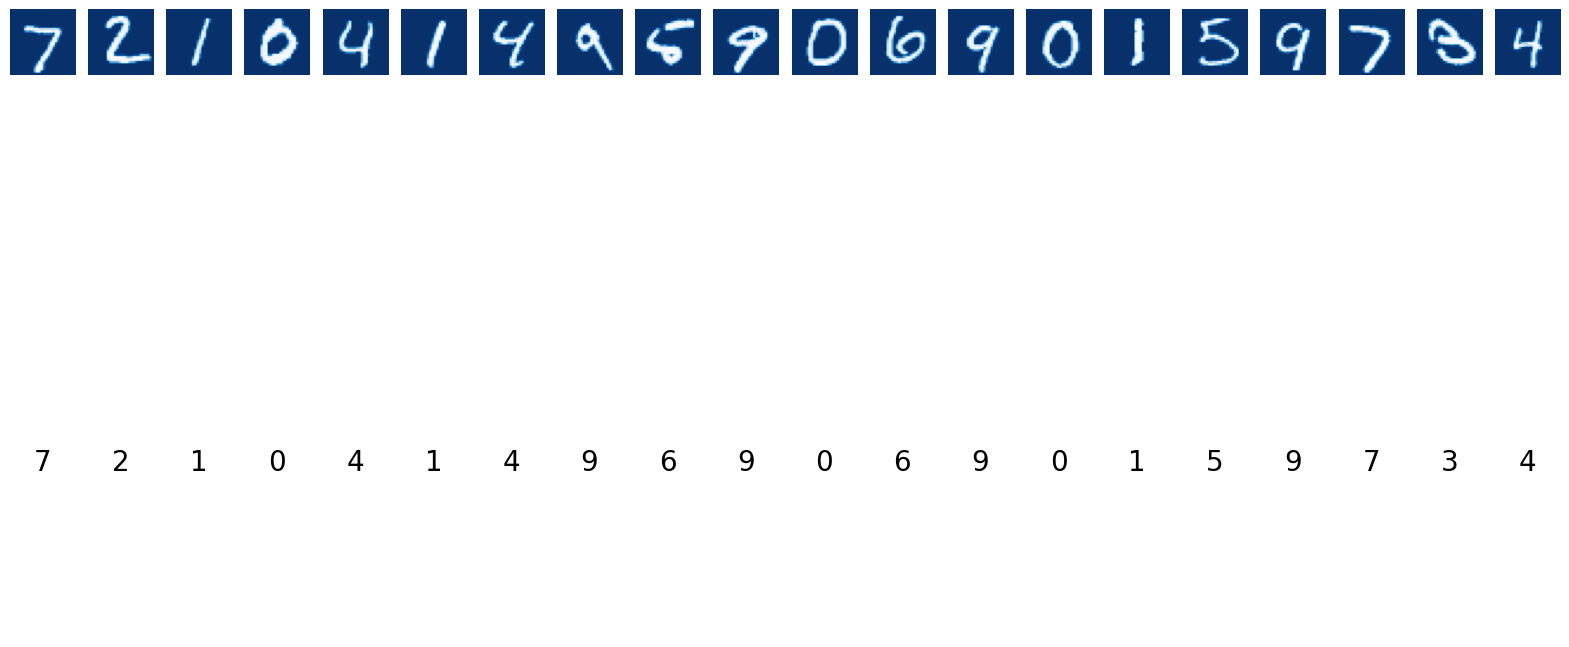

In [33]:
n = len(x_valid)
plt.figure(figsize = (20,10))

for v in range(n):
    pic = plt.subplot(2,n,v+1)
    plt.imshow(x_valid[v].reshape(28,28),cmap = 'Blues_r')
    plt.axis("off")

    predicted_digit = np.argmax(y_pred_probs_valid[v])
    # actual_digit = np.argmax(actual_labels[v])
    pic = plt.subplot(2,n,v+1+n)
    plt.text(0.5,0.5,str(predicted_digit),fontsize = 20,ha = 'center',va = 'center')
    plt.axis('off')

plt.show()
plt.close()